## 0. Load Data

In [1]:
from scipy.io import loadmat
data = loadmat('data/cardio.mat')

In [2]:
gt = data['y']

In [3]:
import pandas as pd
df = pd.DataFrame(data['X'], columns=['Columns_%d'%i for i in range(data['X'].shape[1])])

In [4]:
from profiler.core import *

## 1. Instantiate Engine
* workers : number of processes
* tol     : tolerance for differences when creating training data (set to 0 if data is completely clean)
* eps     : error bound for inverse covariance estimation (since we use conservative calculation when determining minimum sample size, we recommend to set eps <= 0.01)
* embedtxt: if set to true, differentiate b/w textual data and categorical data, and use word embedding for the former

In [5]:
pf = Profiler(workers=2, tol=0.01, eps=0.05, embedtxt=False)

## 2. Load Data
* name: any name you like
* src: \[FILE; DF; DB (not implemented)\]
* fpath: required if src == FILE
* df: required if src == DF
* check_param: print parameters used for data loading

In [6]:
pf.session.load_data(src=DF, df=df, check_param=True)

INFO:profiler.utility:[0.0071849822998046875] Load Data start

INFO:profiler.dataset:parameters used for data loading:
 {'na_values': {'', 'none', 'nan', 'None', 'NaN', '?', 'unknown'}, 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.dataset:inferred types of attributes: {
    "Columns_0": "numeric",
    "Columns_1": "numeric",
    "Columns_2": "numeric",
    "Columns_3": "numeric",
    "Columns_4": "numeric",
    "Columns_5": "numeric",
    "Columns_6": "numeric",
    "Columns_7": "numeric",
    "Columns_8": "numeric",
    "Columns_9": "numeric",
    "Columns_10": "numeric",
    "Columns_11": "numeric",
    "Columns_12": "numeric",
    "Columns_13": "numeric",
    "Columns_14": "numeric",
    "Columns_15": "numeric",
    "Columns_16": "numeric",
    "Columns_17": "numeric",
    "Columns_18": "numeric",
    "Columns_19": "numeric",
    "Columns_20": "numeric"
}
INFO:profiler.datas

In [7]:
pf.session.ds.df.head()

,Columns_0,Columns_1,Columns_2,Columns_3,Columns_4,Columns_5,Columns_6,Columns_7,Columns_8,Columns_9,...,Columns_11,Columns_12,Columns_13,Columns_14,Columns_15,Columns_16,Columns_17,Columns_18,Columns_19,Columns_20
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.208514,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018


### 2.1 Change Data Types of Attributes
* required input:
    * a list of attributes
    * a list of data types (must match the order of the attributes; can be CATEGORICAL, NUMERIC, TEXT, DATE)
* optional input:
    * a list of regular expression extractor

In [8]:
# pf.session.change_dtypes(['ProviderNumber', 'ZipCode', 'PhoneNumber', 'State', 'EmergencyService','Score', 'Sample'], 
#                             [CATEGORICAL, NUMERIC, CATEGORICAL, TEXT, TEXT, NUMERIC, NUMERIC],
#                             [None, None, None, None, None, r'(\d+)%', r'(\d+)\spatients'])

### 2.2. Load/Train Embeddings for TEXT
* path: path to saved/to-save embedding folder
* load: set to true -- load saved vec from 'path'; set to false -- train locally
* save: (only for load = False) save trained vectors to 'path'

In [9]:
#pf.session.load_embedding(save=True, path='data/hospital/', load=True)

## 3. Load Training Data
* multiplier: if set to None, will infer the minimal sample size; otherwise, it will create (# samples) * (# attributes) * (multiplier) training samples

In [10]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[0.07288503646850586] Create Training Data start

INFO:profiler.transformer:needs multiplier = 147 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.transformer:use multiplier = 147, and the bound is 0.00005523
INFO:profiler.transformer:Draw Pairs
100%|██████████| 21/21 [00:00<00:00, 118.61it/s]
INFO:profiler.transformer:Number of training samples: 269157
INFO:profiler.transformer:Computing Differences
INFO:profiler.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.8838710784912109] Create Training Data execution time: 0.8109860420227051



## 4. Learn Structure
* sparsity: intensity of L1-regularizer in inverse covariance estimation (glasso)
* take_neg: if set to true, consider equal -> equal only

In [11]:
autoregress_matrix = pf.session.learn_structure(sparsity=0.05, infer_order=True)

INFO:profiler.utility:[0.8923590183258057] Learn Structure start

INFO:profiler.learner:use threshold 0.0181
INFO:profiler.utility:[1.1677520275115967] Learn Structure execution time: 0.275393009185791



* score: 
    * "fit_error": mse for fitting y = B'X + c for each atttribute y 
    * "training_data_fd_vio_ratio": the higher the score, the more violations of FDs in the training data. (bounded: \[0,1\])

In [12]:
parent_sets = pf.session.get_dependencies(score="fit_error")


INFO:profiler.utility:[1.1729559898376465] Get Dependencies start

INFO:profiler.utility:[1.205225944519043] Get Dependencies execution time: 0.032269954681396484



Columns_4 -> Columns_19 (0.18647190662197086)
Columns_18 -> Columns_17 (0.12881357064615534)
Columns_18 -> Columns_16 (0.14260355088348803)


## 5. Visualization

In [13]:
pf.session.visualize_covariance()

<Figure size 1000x800 with 2 Axes>

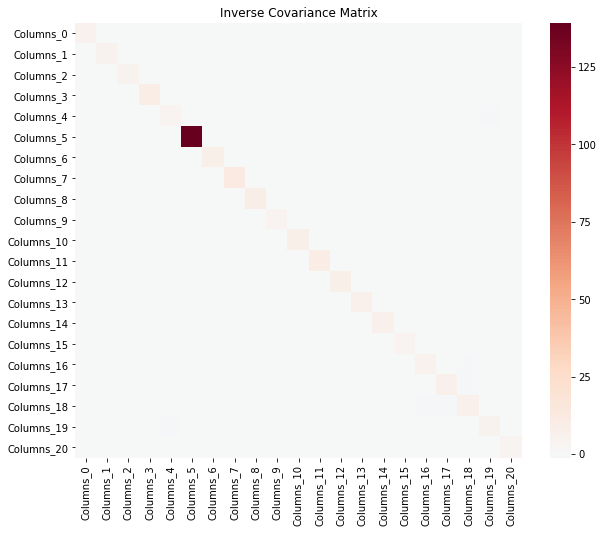

In [14]:
pf.session.visualize_inverse_covariance()

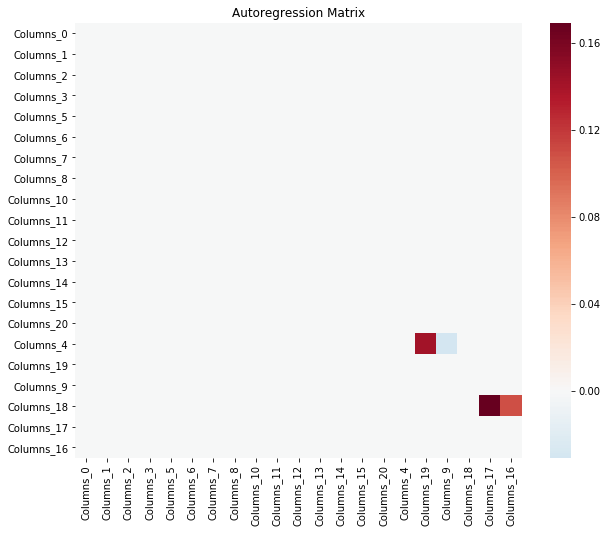

In [15]:
pf.session.visualize_autoregression()

In [16]:
pf.session.timer.get_stat()


,time_point,msg,execution_time
0,0.007185,start: Load Data,0.000000
1,0.019969,end: Load Data,0.012784
2,0.072885,start: Create Training Data,0.000000
3,0.883871,end: Create Training Data,0.810986
4,0.892359,start: Learn Structure,0.000000
5,1.167752,end: Learn Structure,0.275393
6,1.172956,start: Get Dependencies,0.000000
7,1.205226,end: Get Dependencies,0.032270
8,1.205226,total_execution_time,1.131433


In [17]:
gt = gt.reshape(-1,)
gt_idx = np.array(range(gt.shape[0]))[gt == 1]

In [178]:
def outlier(data, m=4):
    return abs(data - np.mean(data)) > m * np.std(data)

def prec_recall(outliers, gt_idx):
    outliers = set(outliers)
    tp = 0.0
    # precision
    if len(outliers) == 0:
        print("no outlier is found")
        recall(tp, outliers, gt_idx)
        print("f1: 0")
        return 0
    for i in outliers:
        if i in gt_idx:
            tp += 1
    prec = tp / len(outliers)
    print("with %d detected outliers, precision is: %.4f"%(len(outliers), prec))
    rec = recall(tp, outliers, gt_idx)
    print("f1: %.4f"%(2 * (prec * rec) / (prec + rec)))
    
def recall(tp, outliers, gt_idx):
    if tp == 0:
        print("with %d outliers in gt, recall is: 0"%(len(gt_idx)))
        return 0 
    print("with %d detected outliers, recall is: %.4f"%(len(outliers), tp / len(gt_idx)))
    return tp / len(gt_idx)




In [179]:
import sklearn
def cmpr_detection(df, left, right, m1=3, m2=3):
    overall=df.index.values[outlier(df[right],m=m1)]
    X = df[left].values.reshape(-1,1)
    outliers = list(overall)
    i = 0
    distances = sklearn.metrics.pairwise_distances(X)
    distances = distances / np.nanmax(distances, axis=1)
    indices = np.array(range(distances.shape[0]))
    for dis in distances:
        # normalize distance
        nbr = indices[dis < pf.session.env['tol']]
        outliers.extend(nbr[outlier(df[right].values[nbr], m=m2)])
        i += 1
    return overall, outliers

In [183]:
base = []
improv = []
for child in parent_sets:
    if len(parent_sets[child]) == 0:
        continue
    print("right: %s"%child)
    print("left: %s"%parent_sets[child])
    overall, structured = cmpr_detection(df, parent_sets[child], child, m2=5)
    base.extend(list(overall))
    improv.extend(structured)
print("naive approach: ")
prec_recall(base, gt_idx)
print("with structural constraints: ")
prec_recall(improv, gt_idx)

right: Columns_19
left: ['Columns_4']
right: Columns_17
left: ['Columns_18']
right: Columns_16
left: ['Columns_18']
naive approach: 
with 74 detected outliers, precision is: 0.7838
with 74 detected outliers, recall is: 0.3295
f1: 0.4640
with structural constraints: 
with 85 detected outliers, precision is: 0.7059
with 85 detected outliers, recall is: 0.3409
f1: 0.4598
